# Limpieza y Exploración Inicial: Tabla `draft_combine_stats`

En este notebook trabajaremos con la tabla `draft_combine_stats.csv`, que contiene información física y de rendimiento de los jugadores evaluados en el NBA Draft Combine.

### Objetivos
1. Revisar estructura y calidad de los datos.  
2. Realizar limpieza básica (nombres de columnas, formatos, unidades).  
3. Crear variables derivadas (IMC, masa grasa estimada, masa libre de grasa).  
4. Manejar valores faltantes y outliers.  
5. Exportar un dataset limpio para futuros análisis.


In [27]:
# Librerías principales
import pandas as pd
import numpy as np



##  Carga de archivo



In [28]:

# Cargar el dataset de Draft Combine
df_combine = pd.read_csv("../data/draft_combine_stats.csv")

# Revisar dimensiones y primeras filas
print("Dimensiones:", df_combine.shape)
df_combine.head()




Dimensiones: (1202, 47)


,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,2001,12033,Adam,Allenspach,Adam Allenspach,C,83.50,6' 11.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2240,Gilbert,Arenas,Gilbert Arenas,SG,74.25,6' 2.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,2220,Brandon,Armstrong,Brandon Armstrong,SG,75.50,6' 3.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,2203,Shane,Battier,Shane Battier,SF-PF,80.25,6' 8.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,12034,Cookie,Belcher,Cookie Belcher,SG-PG,75.00,6' 3'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Información general del dataset
print("\n--- Información general ---")
print(df_combine.info())

# Valores nulos por columna
print("\n--- Valores nulos por columna ---")
print(df_combine.isnull().sum())

# Vista previa de las primeras filas
print("\n--- Primeras filas ---")
df_combine.head()



--- Información general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        1202 non-null   int64  
 1   player_id                     1202 non-null   int64  
 2   first_name                    1202 non-null   object 
 3   last_name                     1202 non-null   object 
 4   player_name                   1202 non-null   object 
 5   position                      1197 non-null   object 
 6   height_wo_shoes               1153 non-null   float64
 7   height_wo_shoes_ft_in         1153 non-null   object 
 8   height_w_shoes                1008 non-null   float64
 9   height_w_shoes_ft_in          1008 non-null   object 
 10  weight                        1152 non-null   float64
 11  wingspan                      1153 non-null   float64
 12  wingspan_ft_in                115

,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,2001,12033,Adam,Allenspach,Adam Allenspach,C,83.50,6' 11.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2240,Gilbert,Arenas,Gilbert Arenas,SG,74.25,6' 2.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,2220,Brandon,Armstrong,Brandon Armstrong,SG,75.50,6' 3.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,2203,Shane,Battier,Shane Battier,SF-PF,80.25,6' 8.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,12034,Cookie,Belcher,Cookie Belcher,SG-PG,75.00,6' 3'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## Pasos iniciales

Identificación de columnas clave:
   - Identificadores: `season`, `player_id`, `player_name`.
   - Antropometría: altura, peso, envergadura, alcance.
   - Composición corporal: % de grasa, largo y ancho de mano.
   - Rendimiento físico: saltos, agilidad, sprint, press banca.
   - Otras: posiciones, métricas de tiro (con muchos nulos).
Plan preliminar:
   - Revisar duplicados en `player_id`.
   - Normalizar posiciones.
   - Eliminar columnas redundantes (`*_ft_in`).
   - Evaluar descartar variables con más de 90% nulos.
   - Mantener métricas antropométricas y físicas principales.


## Resumen estadístico inicial

In [30]:
# Resumen estadístico de variables numéricas
desc = df_combine.describe().T

# Agregar porcentaje de nulos a la tabla
desc["% nulos"] = df_combine.isnull().sum() / len(df_combine) * 100

# Mostrar resumen completo
import pandas as pd
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
desc


,count,mean,std,min,25%,50%,75%,max,% nulos
season,"1,202.00","2,012.54",6.56,"2,001.00","2,007.00","2,012.00","2,018.00","2,023.00",0.00
player_id,"1,202.00","2,350,132.54","56,602,100.27",-1.00,"101,145.50","203,147.00","1,629,013.75","1,962,937,123.00",0.00
height_wo_shoes,"1,153.00",77.57,3.33,67.75,75.25,77.75,80.00,89.25,4.08
height_w_shoes,"1,008.00",78.80,3.32,69.00,76.50,79.00,81.25,91.00,16.14
weight,"1,152.00",214.90,25.72,154.40,195.95,212.90,233.00,314.00,4.16
wingspan,"1,153.00",82.48,3.99,70.00,80.00,82.75,85.25,98.25,4.08
standing_reach,"1,152.00",103.59,4.88,89.50,100.00,104.00,107.00,122.50,4.16
body_fat_pct,"1,003.00",7.35,2.75,2.60,5.40,6.70,8.60,21.00,16.56
hand_length,719.00,8.72,0.48,7.50,8.50,8.75,9.00,10.50,40.18
hand_width,719.00,9.45,0.72,7.00,9.00,9.50,10.00,12.00,40.18


Draft Combine Stats

Temporadas (season) - Rango: 2001 a 2023.

Distribución pareja, sin outliers.

Altura sin y con zapatillas (height_wo_shoes, height_w_shoes)

Promedio: 1.97 m (77.6 in) sin zapatillas, 2.00 m (78.8 in) con zapatillas.

Mínimo razonable (67 in ≈ 1.72 m), máximo extremo pero válido (91 in ≈ 2.31 m).

Peso (weight)

Media: 97.4 kg (214 lb).

Rango: 70 kg – 142 kg → plausible.

Envergadura (wingspan)

Media: 2.09 m (82.5 in).

Mínimo 1.78 m, máximo 2.49 m → posible, aunque conviene chequear ese máximo.

Alcance de pie (standing_reach)

Media: 2.63 m.

Valores entre 2.27 m y 3.11 m → plausibles.

% Grasa corporal (body_fat_pct)

Media: 7.3 %, rango entre 2.6 % y 21 %.

El máximo parece alto para atletas élite, pero plausible en algunos jugadores.

Medidas de mano (hand_length, hand_width)

Valores promedios normales: 8.7 in y 9.4 in (40 % de nulos)

Saltos verticales (standing_vertical_leap, max_vertical_leap)

Promedios: 29 in y 34.6 in. Valores mínimos y máximos coherentes.

Agilidad y velocidad (lane_agility_time, three_quarter_sprint)

Agilidad media: 11.38 seg (rango realista 9.6–13.4).

Sprint ¾ cancha: 3.28 seg promedio, valores correctos.

modified_lane_agility_time está en otra escala (2–3.7 seg) y con 65 % de nulos → probablemente poco útil.

Fuerza (bench_press)

Media: 10 repeticiones (máx 26).

Mínimo 0 → jugadores que no completaron la prueba.


In [31]:
# Revisar duplicados de player_id
dup_player_id = df_combine[df_combine.duplicated(subset=["player_id"], keep=False)]

print("Cantidad de jugadores con registros duplicados:", dup_player_id["player_id"].nunique())
print("Cantidad total de filas duplicadas:", dup_player_id.shape[0])

# Mostrar primeras filas de duplicados para analizarlos
dup_player_id.sort_values("player_id").head(20)


Cantidad de jugadores con registros duplicados: 25
Cantidad total de filas duplicadas: 51


,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
31,2001,-1,Jason,Gardner,Jason Gardner,PG,69.75,5' 9.75'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,2004,-1,Drago,Pasalic,Drago Pasalic,PF,81.25,6' 9.25'',82.75,6' 10.75'',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,2005,-1,Carl,Krauser,Carl Krauser,PG-SG,71.50,5' 11.5'',72.75,6' 0.75'',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,2017,1628959,Rawle,Alkins,Rawle Alkins,SG-SF,74.50,6' 2.5'',75.75,6' 3.75'',...,4-5,3-5,2-6,5-6,3-6,NaN,NaN,NaN,25-39,NaN
847,2018,1628959,Rawle,Alkins,Rawle Alkins,SG,74.75,6' 2.75'',76.25,6' 4.25'',...,5-5,2-5,2-4,1-4,2-4,NaN,NaN,NaN,27-34,NaN
850,2018,1628962,Udoka,Azubuike,Udoka Azubuike,C,82.00,6' 10'',84.25,7' 0.25'',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,2020,1628962,Udoka,Azubuike,Udoka Azubuike,C,82.00,6'10.00'',83.50,6'11.50'',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,2018,1628968,Brian,Bowen,Brian Bowen,SG-SF,78.25,6' 6.25'',79.50,6' 7.5'',...,2-5,2-5,3-4,3-4,1-4,NaN,NaN,NaN,17-29,NaN
922,2019,1628968,Brian,Bowen II,Brian Bowen II,SF,78.25,6' 6.25'',79.50,6' 7.5'',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6-11,NaN
864,2018,1628977,Hamidou,Diallo,Hamidou Diallo,SG,76.25,6' 4.25'',78.00,6' 6'',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# 1. Identificar duplicados en la misma temporada (potenciales errores)
dup_same_season = df_combine[df_combine.duplicated(subset=["player_id", "season"], keep=False)]

print("Duplicados en la misma temporada:", dup_same_season.shape[0])
display(dup_same_season.head(20))

# 2. Crear flag para IDs inválidos (-1)
df_combine["flag_invalid_id"] = df_combine["player_id"] == -1

print("Cantidad de registros con ID inválido:", df_combine["flag_invalid_id"].sum())


Duplicados en la misma temporada: 0


,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college


Cantidad de registros con ID inválido: 3


Se detectaron:

25 jugadores con registros duplicados (51 filas) → corresponden a mediciones en años distintos, por lo que se mantienen para reflejar la evolución física de los prospectos.

3 registros con player_id = -1 → valores inválidos, no permiten vinculación con otras tablas.

Decisión:

Conservar duplicados entre temporadas.

Eliminar registros con player_id = -1 del dataset principal.

Guardar esos casos en un CSV aparte (combine_invalid_ids.csv) para documentar y evitar pérdida de información.

In [33]:
import os

# Ruta a la carpeta donde guardamos los limpios
output_dir = r"C:\Users\elian\OneDrive\Escritorio\NBA_ComposicionCorporal_Rendimiento\data_clean"

# Crear carpeta si no existe
os.makedirs(output_dir, exist_ok=True)

# 1. Identificar IDs inválidos (faltantes o -1)
invalid_ids = df_combine[df_combine["player_id"].isna() | (df_combine["player_id"] == -1)].copy()

# 2. Guardar IDs inválidos para documentación
if not invalid_ids.empty:
    invalid_ids.to_csv(os.path.join(output_dir, "combine_invalid_ids.csv"), index=False)
    print(f"Guardados {len(invalid_ids)} registros inválidos en combine_invalid_ids.csv")
else:
    print("No se encontraron IDs inválidos en el dataset")

# 3. Eliminar del dataset principal
df_combine = df_combine[~df_combine.index.isin(invalid_ids.index)].copy()

print("Base actualizada sin IDs inválidos.")
print("Dimensiones actuales:", df_combine.shape)




Guardados 3 registros inválidos en combine_invalid_ids.csv
Base actualizada sin IDs inválidos.
Dimensiones actuales: (1199, 48)


## Conversión de unidades y redondeo

Conversión de altura (pulgadas a metros).

Conversión de peso (libras a kilogramos).

Conversión de wingspan y standing reach (pulgadas a metros).

Redondeo a un decimal.

Validación de los primeros registros.

In [34]:
# Conversión y redondeo a 1 decimal
df_combine["height_wo_shoes_m"] = (df_combine["height_wo_shoes"] * 0.0254).round(1)
df_combine["height_w_shoes_m"] = (df_combine["height_w_shoes"] * 0.0254).round(1)
df_combine["weight_kg"] = (df_combine["weight"] * 0.453592).round(1)
df_combine["wingspan_m"] = (df_combine["wingspan"] * 0.0254).round(1)
df_combine["standing_reach_m"] = (df_combine["standing_reach"] * 0.0254).round(1)

# Validación rápida
print(df_combine[[
    "player_name", 
    "height_wo_shoes", "height_wo_shoes_m",
    "height_w_shoes", "height_w_shoes_m",
    "weight", "weight_kg",
    "wingspan", "wingspan_m",
    "standing_reach", "standing_reach_m"
]].head(10))


             player_name  height_wo_shoes  height_wo_shoes_m  height_w_shoes  \
0        Adam Allenspach            83.50               2.10             NaN   
1         Gilbert Arenas            74.25               1.90             NaN   
2      Brandon Armstrong            75.50               1.90             NaN   
3          Shane Battier            80.25               2.00             NaN   
4         Cookie Belcher            75.00               1.90             NaN   
5           Charlie Bell            74.50               1.90             NaN   
6  Ruben Boumtje-Boumtje            83.50               2.10             NaN   
7          Calvin Bowman            80.75               2.10             NaN   
8        Michael Bradley            81.50               2.10             NaN   
9         Jamison Brewer            74.50               1.90             NaN   

   height_w_shoes_m  weight  weight_kg  wingspan  wingspan_m  standing_reach  \
0               NaN  259.00     117.50 

## Conversión de métricas de salto vertical

Identificación de métricas disponibles: standing_vertical_leap y max_vertical_leap.

Conversión de pulgadas a centímetros.

Creación de nuevas columnas con sufijo _cm.

Validación de los primeros registros.

In [35]:
# Conversión de saltos verticales (pulgadas → cm)
df_combine["standing_vertical_leap_cm"] = (df_combine["standing_vertical_leap"] * 2.54).round(1)
df_combine["max_vertical_leap_cm"] = (df_combine["max_vertical_leap"] * 2.54).round(1)

# Validación rápida
print(df_combine[[
    "player_name",
    "standing_vertical_leap", "standing_vertical_leap_cm",
    "max_vertical_leap", "max_vertical_leap_cm"
]].head(10))



             player_name  standing_vertical_leap  standing_vertical_leap_cm  \
0        Adam Allenspach                   28.50                      72.40   
1         Gilbert Arenas                   31.50                      80.00   
2      Brandon Armstrong                   30.00                      76.20   
3          Shane Battier                   29.50                      74.90   
4         Cookie Belcher                   35.00                      88.90   
5           Charlie Bell                   31.50                      80.00   
6  Ruben Boumtje-Boumtje                   26.50                      67.30   
7          Calvin Bowman                   28.50                      72.40   
8        Michael Bradley                   27.00                      68.60   
9         Jamison Brewer                   26.00                      66.00   

   max_vertical_leap  max_vertical_leap_cm  
0              31.00                 78.70  
1              36.00                 91.

## Normalización de nombres de jugadores

Se crea una nueva columna player_name_clean a partir de player_name.

Se eliminan guiones y espacios múltiples.

Se asegura un formato uniforme de mayúsculas en los nombres.

Esto permitirá el merge confiable con la columna equivalente en common_player_info_clean_vFinal.csv.

In [36]:
# Crear columna de nombres normalizados
df_combine["player_name_clean"] = (
    df_combine["player_name"]
    .str.replace("-", " ", regex=False)      # reemplaza guiones por espacios
    .str.replace(r"\s+", " ", regex=True)    # elimina espacios dobles
    .str.strip()                             # quita espacios al inicio/final
    .str.title()                             # pasa a formato "Nombre Apellido"
)

# Validación rápida
print(df_combine[["player_name", "player_name_clean"]].head(15))



              player_name      player_name_clean
0         Adam Allenspach        Adam Allenspach
1          Gilbert Arenas         Gilbert Arenas
2       Brandon Armstrong      Brandon Armstrong
3           Shane Battier          Shane Battier
4          Cookie Belcher         Cookie Belcher
5            Charlie Bell           Charlie Bell
6   Ruben Boumtje-Boumtje  Ruben Boumtje Boumtje
7           Calvin Bowman          Calvin Bowman
8         Michael Bradley        Michael Bradley
9          Jamison Brewer         Jamison Brewer
10            Kwame Brown            Kwame Brown
11       SirValiant Brown       Sirvaliant Brown
12           Damone Brown           Damone Brown
13           Ryan Carroll           Ryan Carroll
14         Tyson Chandler         Tyson Chandler


In [37]:
# Validación rápida del estado actual de df_combine

# Dimensiones
print("Shape:", df_combine.shape)

# Primeras filas con métricas convertidas
print(df_combine[[
    "player_id", "player_name", "player_name_clean",
    "height_wo_shoes_m", "height_w_shoes_m",
    "weight_kg", "wingspan_m", "standing_reach_m",
    "body_fat_pct", "standing_vertical_leap_cm", "max_vertical_leap_cm",
    "lane_agility_time"
]].head(10))

# Revisar si hay nulos
print(df_combine.isna().sum())


Shape: (1199, 56)
   player_id            player_name      player_name_clean  height_wo_shoes_m  \
0      12033        Adam Allenspach        Adam Allenspach               2.10   
1       2240         Gilbert Arenas         Gilbert Arenas               1.90   
2       2220      Brandon Armstrong      Brandon Armstrong               1.90   
3       2203          Shane Battier          Shane Battier               2.00   
4      12034         Cookie Belcher         Cookie Belcher               1.90   
5       2294           Charlie Bell           Charlie Bell               1.90   
6       2257  Ruben Boumtje-Boumtje  Ruben Boumtje Boumtje               2.10   
7      12035          Calvin Bowman          Calvin Bowman               2.10   
8       2214        Michael Bradley        Michael Bradley               2.10   
9       2249         Jamison Brewer         Jamison Brewer               1.90   

   height_w_shoes_m  weight_kg  wingspan_m  standing_reach_m  body_fat_pct  \
0           

In [38]:
# Revisar valores únicos de posiciones en combine
print("Valores únicos en combine:")
print(df_combine["position"].dropna().unique())

# Contar frecuencia de cada posición
print("\nFrecuencia de posiciones en combine:")
print(df_combine["position"].value_counts(dropna=False).head(20))


Valores únicos en combine:
['C' 'SG' 'SF-PF' 'SG-PG' 'PG' 'PF' 'PF-C' 'SF' 'SF-SG' 'C-PF' 'PG-SG'
 'PF-SF' 'SG-SF']

Frecuencia de posiciones en combine:
position
PF       215
PG       200
SG       193
SF       148
C        106
SG-SF     64
PF-C      49
SF-PF     44
C-PF      44
PG-SG     39
PF-SF     34
SF-SG     33
SG-PG     25
NaN        5
Name: count, dtype: int64


In [39]:
# Mantener la columna completa (renombrada para consistencia con common)
df_combine["position_all"] = df_combine["position"]

# Crear columna con posición principal (la primera antes de "-")
df_combine["position_main"] = (
    df_combine["position_all"]
    .fillna("")  # evita errores con NaN
    .apply(lambda x: x.split("-")[0] if x else None)
)

# Validación
print(df_combine[["player_name_clean", "position_all", "position_main"]].head(20))

# Conteo de posiciones principales
print("\nFrecuencia de main positions:")
print(df_combine["position_main"].value_counts(dropna=False))


        player_name_clean position_all position_main
0         Adam Allenspach            C             C
1          Gilbert Arenas           SG            SG
2       Brandon Armstrong           SG            SG
3           Shane Battier        SF-PF            SF
4          Cookie Belcher        SG-PG            SG
5            Charlie Bell           PG            PG
6   Ruben Boumtje Boumtje            C             C
7           Calvin Bowman           PF            PF
8         Michael Bradley           PF            PF
9          Jamison Brewer           PG            PG
10            Kwame Brown         PF-C            PF
11       Sirvaliant Brown           PG            PG
12           Damone Brown           SF            SF
13           Ryan Carroll        SF-SG            SF
14         Tyson Chandler        SF-PF            SF
15         Eric Chenowith            C             C
16             Sam Clancy           PF            PF
17      Gyasi Cline Heard           PF        

In [40]:
# Variables físicas clave
cols_phys = [
    "height_wo_shoes_m", "height_w_shoes_m",
    "weight_kg", "wingspan_m", "standing_reach_m",
    "body_fat_pct", "standing_vertical_leap_cm",
    "max_vertical_leap_cm", "lane_agility_time"
]

# Estadísticos descriptivos
print(df_combine[cols_phys].describe().T)

# Conteo de nulos
print("\nNulos por variable:")
print(df_combine[cols_phys].isna().sum())


                             count  mean   std   min   25%   50%    75%    max
height_wo_shoes_m         1,150.00  1.97  0.09  1.70  1.90  2.00   2.00   2.30
height_w_shoes_m          1,006.00  2.00  0.09  1.80  1.90  2.00   2.10   2.30
weight_kg                 1,149.00 97.49 11.67 70.00 88.90 96.60 105.70 142.40
wingspan_m                1,150.00  2.10  0.10  1.80  2.00  2.10   2.20   2.50
standing_reach_m          1,149.00  2.63  0.13  2.30  2.50  2.60   2.70   3.10
body_fat_pct              1,001.00  7.35  2.75  2.60  5.40  6.70   8.60  21.00
standing_vertical_leap_cm 1,014.00 74.27  7.75 52.10 68.60 73.70  80.00 100.30
max_vertical_leap_cm      1,014.00 87.99  9.26 63.50 81.30 87.60  94.00 115.60
lane_agility_time         1,005.00 11.38  0.58  9.65 10.97 11.32  11.72  13.44

Nulos por variable:
height_wo_shoes_m             49
height_w_shoes_m             193
weight_kg                     50
wingspan_m                    49
standing_reach_m              50
body_fat_pct            

Resumen 

Alturas y wingspan → valores normales para jugadores NBA (1.70 m – 2.30 m).

Peso → promedio 97 kg, rango razonable (70 – 142 kg).

% de grasa → promedio 7.3 %, rango plausible (2.6 – 21).

Verticales → plausibles (52 – 115 cm).

Agilidad → entre 9.6 y 13.4 segundos.

Nulos: entre 49 y 198 según variable.

In [41]:
# Revisar los valores extremos en cada variable
for col in cols_phys:
    print(f"\nTop 5 valores más altos en {col}:")
    print(df_combine[["player_name_clean", col]].sort_values(by=col, ascending=False).head())

    print(f"\nTop 5 valores más bajos en {col}:")
    print(df_combine[["player_name_clean", col]].sort_values(by=col, ascending=True).head())



Top 5 valores más altos en height_wo_shoes_m:
     player_name_clean  height_wo_shoes_m
935         Tacko Fall               2.30
75         Loren Woods               2.20
672   Jordan Bachynski               2.20
1154  Ryan Kalkbrenner               2.20
24         Robb Dryden               2.20

Top 5 valores más bajos en height_wo_shoes_m:
    player_name_clean  height_wo_shoes_m
536     Isaiah Thomas               1.70
80      Andre Barrett               1.70
140     Nate Robinson               1.70
495       Norris Cole               1.80
449   Sherron Collins               1.80

Top 5 valores más altos en height_w_shoes_m:
             player_name_clean  height_w_shoes_m
935                 Tacko Fall              2.30
164   Martynas Andriuskevicius              2.20
222            Luke Schenscher              2.20
1118             Mark Williams              2.20
258                 Aaron Gray              2.20

Top 5 valores más bajos en height_w_shoes_m:
    player_name_clean 

## Tratamiento de  nulos

Mantener todas las métricas físicas clave, aunque tengan algunos nulos (se pueden excluir dinámicamente en análisis estadísticos o gráficos).

Eliminar las columnas de tiro con >80% nulos, documentando que no son útiles para el análisis de composición corporal ni para benchmarking.

In [42]:
# Conteo de nulos en todas las columnas
null_counts = df_combine.isna().sum().sort_values(ascending=False)

print("Conteo de nulos por columna:")
print(null_counts.head(30))  # mostramos las 30 con más nulos


Conteo de nulos por columna:
off_drib_college_top_key        1168
off_drib_college_break_right    1168
spot_fifteen_corner_left        1125
spot_fifteen_top_key            1123
spot_fifteen_break_right        1123
spot_fifteen_corner_right       1123
spot_fifteen_break_left         1123
off_drib_college_break_left     1089
on_move_college                 1083
on_move_fifteen                 1051
spot_college_break_left         1033
off_drib_fifteen_top_key        1033
spot_college_top_key            1033
spot_college_break_right        1033
off_drib_fifteen_break_right    1033
spot_college_corner_right       1033
off_drib_fifteen_break_left     1033
spot_nba_break_right             982
spot_nba_break_left              982
spot_nba_top_key                 982
spot_nba_corner_right            982
spot_nba_corner_left             982
spot_college_corner_left         954
modified_lane_agility_time       788
hand_width                       480
hand_length                      480
bench_pre

In [43]:
# Umbral de nulos (80%)
threshold = 0.8 * len(df_combine)

# Columnas a eliminar
cols_drop = null_counts[null_counts > threshold].index.tolist()

print("Columnas a eliminar por exceso de nulos (>80%):")
print(cols_drop)

# Eliminar del dataset
df_combine = df_combine.drop(columns=cols_drop)

print("Shape después de eliminar columnas:", df_combine.shape)


Columnas a eliminar por exceso de nulos (>80%):
['off_drib_college_top_key', 'off_drib_college_break_right', 'spot_fifteen_corner_left', 'spot_fifteen_top_key', 'spot_fifteen_break_right', 'spot_fifteen_corner_right', 'spot_fifteen_break_left', 'off_drib_college_break_left', 'on_move_college', 'on_move_fifteen', 'spot_college_break_left', 'off_drib_fifteen_top_key', 'spot_college_top_key', 'spot_college_break_right', 'off_drib_fifteen_break_right', 'spot_college_corner_right', 'off_drib_fifteen_break_left', 'spot_nba_break_right', 'spot_nba_break_left', 'spot_nba_top_key', 'spot_nba_corner_right', 'spot_nba_corner_left']
Shape después de eliminar columnas: (1199, 36)


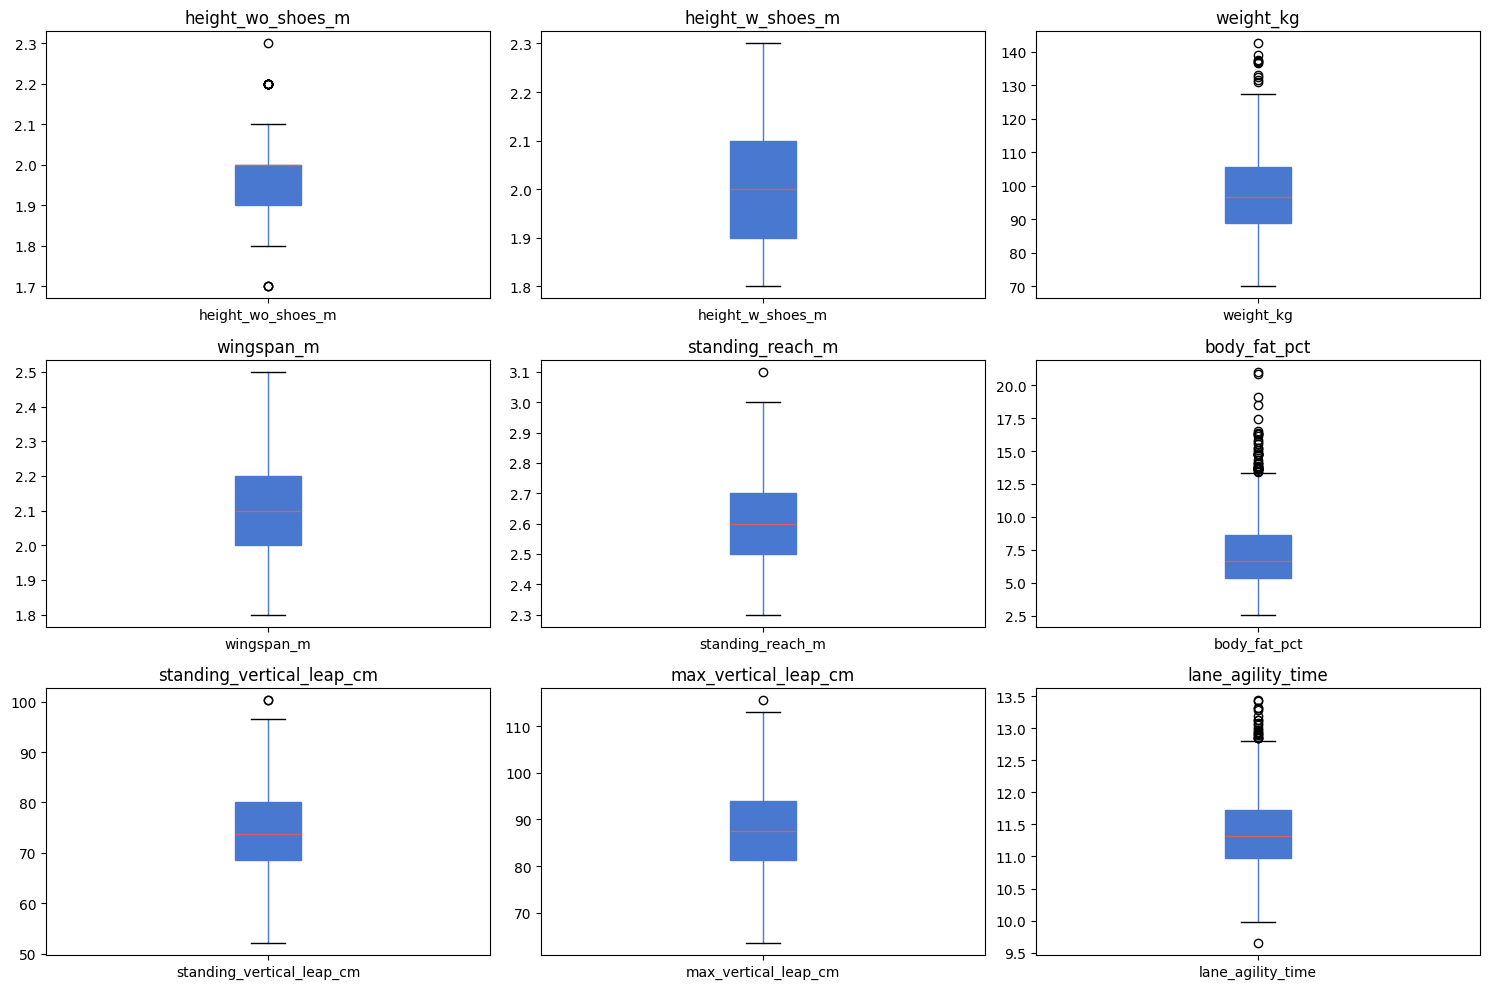

In [44]:
import matplotlib.pyplot as plt

# Variables físicas clave
cols_phys = [
    "height_wo_shoes_m", "height_w_shoes_m",
    "weight_kg", "wingspan_m", "standing_reach_m",
    "body_fat_pct", "standing_vertical_leap_cm",
    "max_vertical_leap_cm", "lane_agility_time"
]

# Usar el mismo estilo que en common
plt.style.use("seaborn-v0_8-muted")

# Subplots 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols_phys):
    df_combine.boxplot(column=col, ax=axes[i], grid=False, patch_artist=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()



## Cálculo de masa grasa y masa libre de grasa

Permite descomponer el peso corporal en masa grasa (FM) y masa libre de grasa (FFM).

Es clave para el análisis porque:

El % de grasa por sí solo no refleja magnitud absoluta.

La FFM se relaciona con potencia, fuerza y rendimiento.

La FM puede asociarse con menor velocidad/agilidad.

Estas variables enriquecen el dataset y facilitan correlaciones con saltos, agilidad y comparaciones por posición.

In [45]:
# Calcular masa grasa (FM) y masa libre de grasa (FFM)
df_combine["fat_mass_kg"] = (df_combine["weight_kg"] * df_combine["body_fat_pct"] / 100).round(2)
df_combine["fat_free_mass_kg"] = (df_combine["weight_kg"] - df_combine["fat_mass_kg"]).round(2)

# Validación
print(df_combine[["player_name_clean", "weight_kg", "body_fat_pct", "fat_mass_kg", "fat_free_mass_kg"]].head(10))


       player_name_clean  weight_kg  body_fat_pct  fat_mass_kg  \
0        Adam Allenspach     117.50         12.40        14.57   
1         Gilbert Arenas      90.30          5.30         4.79   
2      Brandon Armstrong      85.30          9.30         7.93   
3          Shane Battier     103.90          9.30         9.66   
4         Cookie Belcher      93.40          5.30         4.95   
5           Charlie Bell      90.70          6.70         6.08   
6  Ruben Boumtje Boumtje     111.10          6.00         6.67   
7          Calvin Bowman      97.10          8.60         8.35   
8        Michael Bradley     103.00          9.30         9.58   
9         Jamison Brewer      80.70          6.70         5.41   

   fat_free_mass_kg  
0            102.93  
1             85.51  
2             77.37  
3             94.24  
4             88.45  
5             84.62  
6            104.43  
7             88.75  
8             93.42  
9             75.29  


## Resultados de masa grasa y libre de grasa

Validación

Los cálculos se realizaron correctamente a partir de weight_kg y body_fat_pct.

Ejemplo: Adam Allenspach → peso 117.5 kg, 12.4 % de grasa →

FM ≈ 14.6 kg

FFM ≈ 102.9 kg

Importancia para el análisis

FM (kg): masa grasa absoluta, permite identificar jugadores con exceso relativo de peso graso.

FFM (kg): masa muscular + hueso, relacionada con fuerza y potencia.

Estas métricas permiten correlacionar composición corporal con rendimiento en saltos verticales, agilidad y comparaciones por posición.

Estado actual

Dataset enriquecido con variables derivadas clave para el análisis de rendimiento.

Listo para pasar a correlaciones y visualizaciones avanzadas (scatterplots, heatmaps).

## Conclusión

No se eliminan outliers, ya que todos corresponden a jugadores reales y plausibles en un contexto NBA.

Se documenta la existencia de valores extremos como parte de la diversidad física de los prospectos.

El dataset queda listo para la fase de análisis: correlaciones, comparaciones por posición y posterior integración con otras tablas (common, rendimiento, lesiones).

## Correlaciones composición corporal vs rendimiento

### Variables de composición corporal

weight_kg

body_fat_pct

fat_mass_kg

fat_free_mass_kg

### Variables de rendimiento

standing_vertical_leap_cm

max_vertical_leap_cm

lane_agility_time

### Objetivo

Detectar asociaciones estadísticas (positivas o negativas).

Hipótesis:

Menor % de grasa → mejores saltos (↑vertical).

Mayor FFM → mejor potencia.

Menor FM → mejor agilidad (↓tiempo).

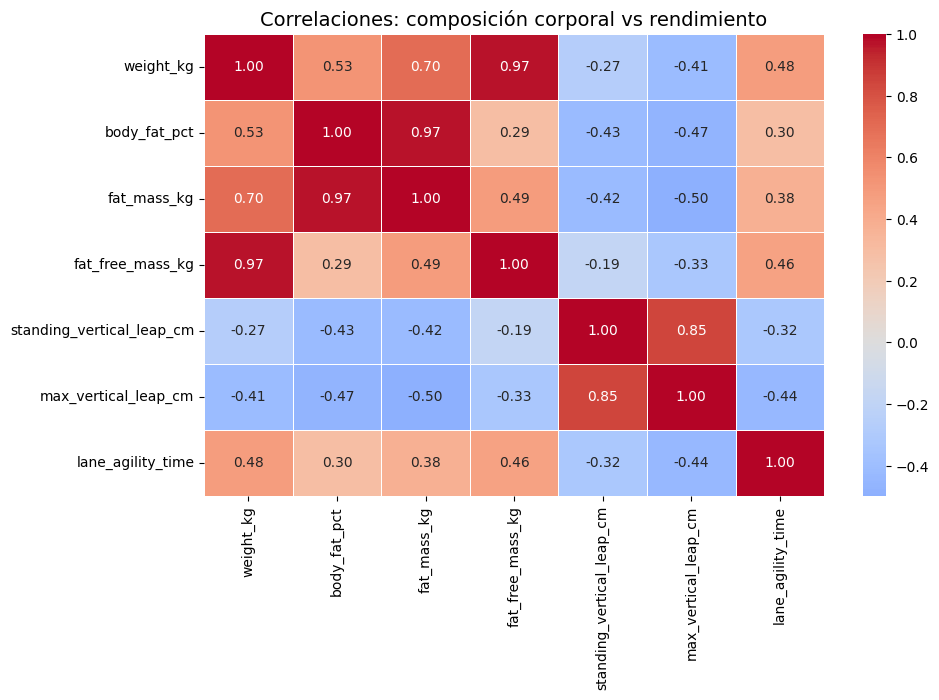

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables de correlación
corr_vars = [
    "weight_kg", "body_fat_pct", "fat_mass_kg", "fat_free_mass_kg",
    "standing_vertical_leap_cm", "max_vertical_leap_cm", "lane_agility_time"
]

# Matriz de correlación
corr_matrix = df_combine[corr_vars].corr()

# Estilo consistente
plt.style.use("seaborn-v0_8-muted")

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True, fmt=".2f",
    cmap="coolwarm", center=0,
    linewidths=0.5, linecolor="white"
)
plt.title("Correlaciones: composición corporal vs rendimiento", fontsize=14)
plt.show()



## Interpretación de correlaciones

### Peso y masa grasa

weight_kg, body_fat_pct y fat_mass_kg están fuertemente correlacionados entre sí.

Confirma que a mayor peso, mayor % de grasa y mayor masa grasa.

### Masa libre de grasa (FFM)

Muy correlacionada con peso (0.97), pero menos con % de grasa (0.29).

Indica que jugadores pesados pueden tener más masa muscular, no solo grasa.

### Saltos verticales

Correlación negativa con peso, % de grasa y masa grasa (≈ -0.40 a -0.50).

Jugadores más livianos y con menor grasa tienden a saltar más.

Correlación fuerte entre standing_vertical_leap y max_vertical_leap (0.85).

### Agilidad lateral (lane_agility_time)

Correlación positiva con peso, grasa y masa grasa (≈ 0.30–0.48).

Más peso y grasa → tiempos más lentos.

Correlación negativa con saltos (-0.32 a -0.44) → jugadores que saltan más también son más ágiles.

## Conclusión

Menor grasa corporal se asocia con mejor rendimiento explosivo y de agilidad.

Mayor masa libre de grasa podría aportar potencia, pero no siempre se traduce en mejor salto o agilidad (correlaciones más débiles).

Estos hallazgos refuerzan la importancia de la composición corporal (no solo el peso) en el rendimiento.

## Composición corporal y rendimiento por posición

### Bases (PG, SG)

Menor peso y % de grasa.

Destacan en agilidad (↓ tiempos) y saltos.

El exceso de peso/grasa afecta más a su rendimiento porque su rol exige velocidad.

### Aleros (SF, algunos PF)

Valores intermedios: equilibrio entre fuerza y movilidad.

Necesitan mantener un % de grasa moderado para rendir en defensa y transiciones.

### Internos (PF, C)

Más pesados, mayor % de grasa y masa grasa.

Tienden a tener peor agilidad y saltos más bajos.

Pero la masa libre de grasa (FFM) es crucial: les da fuerza para rebotes y contacto físico.

               weight_kg  body_fat_pct  fat_mass_kg  fat_free_mass_kg  \
position_main                                                           
C                 112.10          9.10        10.39            101.70   
PF                106.21          8.33         8.97             97.29   
PG                 84.93          6.40         5.46             79.47   
SF                 97.75          6.98         6.90             91.05   
SG                 91.32          6.56         6.05             85.56   

               standing_vertical_leap_cm  max_vertical_leap_cm  \
position_main                                                    
C                                  68.74                 78.98   
PF                                 73.09                 85.26   
PG                                 75.53                 91.00   
SF                                 75.32                 89.46   
SG                                 76.27                 91.46   

               lane_agili

C:\Users\elian\AppData\Local\Temp\ipykernel_13328\775389232.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combine, x="position_main", y=col, ax=axes[i], palette="muted")
C:\Users\elian\AppData\Local\Temp\ipykernel_13328\775389232.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combine, x="position_main", y=col, ax=axes[i], palette="muted")
C:\Users\elian\AppData\Local\Temp\ipykernel_13328\775389232.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combine, x="position_main", y=col, ax=axes[i], palette="

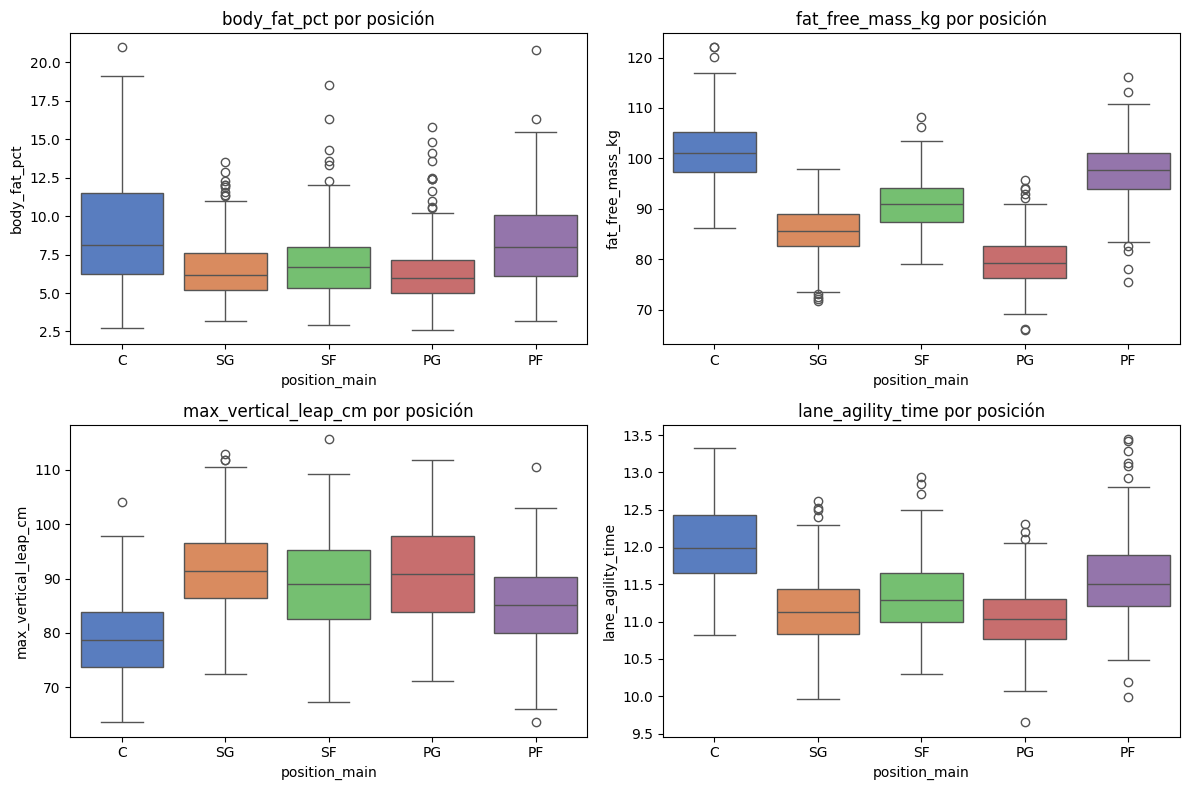

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupación por posición principal
group_stats = df_combine.groupby("position_main")[[
    "weight_kg", "body_fat_pct", "fat_mass_kg", "fat_free_mass_kg",
    "standing_vertical_leap_cm", "max_vertical_leap_cm", "lane_agility_time"
]].mean().round(2)

print(group_stats)

# Boxplots comparativos por posición
metrics = ["body_fat_pct", "fat_free_mass_kg", "max_vertical_leap_cm", "lane_agility_time"]

plt.style.use("seaborn-v0_8-muted")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(metrics):
    sns.boxplot(data=df_combine, x="position_main", y=col, ax=axes[i], palette="muted")
    axes[i].set_title(f"{col} por posición")

plt.tight_layout()
plt.show()


## Interpretación por posición

### % de grasa corporal (body_fat_pct)

C y PF presentan mayor % de grasa (medianas más altas).

PG y SG tienen los valores más bajos.

SF se ubican en valores intermedios.

### Masa libre de grasa (fat_free_mass_kg)

C y PF destacan con mayor masa libre de grasa → reflejo de cuerpos más grandes y musculosos.

PG los más bajos, seguidos de cerca por SG.

SF nuevamente en posición intermedia.

### Salto vertical máximo (max_vertical_leap_cm)

PG y SG presentan mejores saltos (medianas más altas, con varios outliers por encima de 110 cm).

C los más bajos, PF intermedios.

SF en un punto medio-alto, con buena variabilidad.

### Agilidad lateral (lane_agility_time)

C los más lentos (tiempos más altos).

PG y SG los más rápidos (tiempos bajos).

SF y PF en la franja intermedia.

## Conclusión

El patrón confirma lo esperado:

Bases (PG, SG) → menor peso y grasa, mayor salto y agilidad.

Internos (C, PF) → más pesados, más masa muscular y grasa, menor agilidad y salto.

Aleros (SF) → perfil mixto, equilibrio entre potencia y movilidad.

Este análisis muestra claramente cómo la composición corporal influye de forma diferenciada según el rol en cancha.

In [60]:
import pandas as pd

df_common = pd.read_csv(
    r"C:\Users\elian\OneDrive\Escritorio\NBA_ComposicionCorporal_Rendimiento\data_clean\common_player_info_clean_vFinal.csv"
)

print("Columnas en common:", df_common.columns.tolist())
print("Primeras filas:")
print(df_common.head(3))


Columnas en common: ['person_id', 'display_first_last', 'player_slug', 'birthdate', 'school', 'country', 'last_affiliation', 'season_exp', 'jersey', 'position', 'rosterstatus', 'games_played_current_season_flag', 'team_id', 'team_name', 'team_abbreviation', 'team_code', 'team_city', 'playercode', 'from_year', 'to_year', 'dleague_flag', 'nba_flag', 'games_played_flag', 'draft_year', 'draft_round', 'draft_number', 'greatest_75_flag', 'age', 'age_at_debut', 'age_at_last_season', 'height_m', 'weight_kg', 'BMI', 'body_fat_pct_est', 'fat_mass_kg', 'lean_mass_kg', 'player_name_clean', 'all_positions', 'main_position']
Primeras filas:
   person_id   display_first_last          player_slug   birthdate  \
0      76001       Alaa Abdelnaby       alaa-abdelnaby  1968-06-24   
1      76003  Kareem Abdul-Jabbar  kareem-abdul-jabbar  1947-04-16   
2       1505    Tariq Abdul-Wahad    tariq-abdul-wahad  1974-11-03   

           school        country       last_affiliation  season_exp jersey  \
0     

In [61]:
import pandas as pd

# Ruta de salida con nombre simple
path_combine_ready = r"C:\Users\elian\OneDrive\Escritorio\NBA_ComposicionCorporal_Rendimiento\data_clean\combine_ready.csv"

# Guardar el dataframe limpio
df_combine.to_csv(path_combine_ready, index=False)

print("Combine limpio guardado en:", path_combine_ready)
print("Dimensiones finales:", df_combine.shape)
print("Primeras columnas:", df_combine.columns[:10])



Combine limpio guardado en: C:\Users\elian\OneDrive\Escritorio\NBA_ComposicionCorporal_Rendimiento\data_clean\combine_ready.csv
Dimensiones finales: (1199, 38)
Primeras columnas: Index(['season', 'player_id', 'first_name', 'last_name', 'player_name',
       'position', 'height_wo_shoes', 'height_wo_shoes_ft_in',
       'height_w_shoes', 'height_w_shoes_ft_in'],
      dtype='object')
